In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pathlib import Path
from statistics import mean
from matplotlib import style
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
Score_Genre_df = pd.read_csv("../../csv_file/Score_Genre_Earnings.csv")
Score_Genre_df = Score_Genre_df.set_index('Key')

# Empty columns need to be dropped after merge
# Trial and error of making DataFrames found that these four columns were all null
Score_Genre_df = Score_Genre_df.drop(['SHORT WAR', 'REALITY-TV', 'TALK-SHOW', 'GAME-SHOW'], axis=1)

Score_Genre_df.rename(columns = {"SCI-FI": "SCI_FI"}, inplace = True)
Score_Genre_df.head()

,Hidden_Gem_Score,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,ACTION,DRAMA,SCI_FI,THRILLER,MYSTERY,HISTORY,...,HORROR,DOCUMENTARY,WESTERN,BIOGRAPHY,FAMILY,MUSIC,MUSICAL,FANTASY,WAR,NEWS
Key,,,,,,,,,,,,,,,,,,,,,
5,16.0,61.0,8.0,29.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,25.0,68.0,36.0,48.0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8,36.0,75.0,81.0,62.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
15,42.0,83.0,89.0,78.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
16,37.0,63.0,91.0,70.0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
# Grabbing all column names to see all genre names
# Then giving each genre its own DataFrame
for col in Score_Genre_df.columns:
    print(col)

Hidden_Gem_Score
IMDb_Score
Rotten_Tomatoes_Score
Metacritic_Score
ACTION
DRAMA
SCI_FI
THRILLER
MYSTERY
HISTORY
CRIME
ADVENTURE
ANIMATION
COMEDY
ROMANCE
SPORT
HORROR
DOCUMENTARY
WESTERN
BIOGRAPHY
FAMILY
MUSIC
MUSICAL
FANTASY
WAR
NEWS


In [4]:
# Action
Score_Genre_df_Action = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'ACTION'])
Score_Genre_df_Action = Score_Genre_df_Action[Score_Genre_df_Action['ACTION']!= 0]
Score_Genre_df_Action

,Hidden_Gem_Score,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,ACTION
Key,,,,,
21,24.0,58.0,39.0,49.0,1
35,31.0,65.0,68.0,52.0,1
36,22.0,50.0,40.0,45.0,1
37,29.0,53.0,68.0,53.0,1
40,16.0,51.0,9.0,34.0,1
...,...,...,...,...,...
9379,43.0,74.0,76.0,63.0,1
9389,34.0,62.0,76.0,67.0,1
9406,32.0,67.0,68.0,55.0,1


In [5]:
# Set DataFrame to Action columns to lists for best fits
Action_IMDb_list = Score_Genre_df_Action['IMDb_Score'].tolist()
Action_Tomatoes_list = Score_Genre_df_Action['Rotten_Tomatoes_Score'].tolist()
Action_Metacritic_list = Score_Genre_df_Action['Metacritic_Score'].tolist()
Action_Hidden_Gem_list = Score_Genre_df_Action['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Action_IMDb_list, dtype=np.float64)
T = np.array(Action_Tomatoes_list, dtype=np.float64)
M = np.array(Action_Metacritic_list, dtype=np.float64)
H = np.array(Action_Hidden_Gem_list, dtype=np.float64)

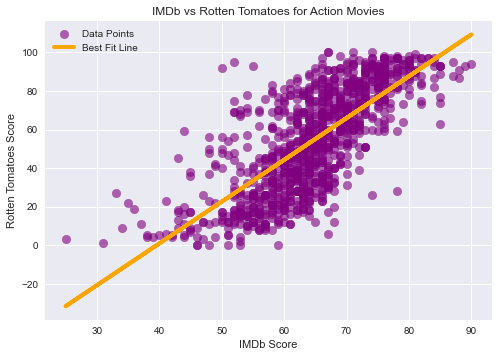

In [6]:
# IMDb vs. Rotten Tomatoes Action
# Create linear regression object
IMDb_Tomatoes_Action = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Action.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Action.predict(I.reshape(-1,1))

# Code for making predictions
#IMDb_score = 30
#Rotten_Tomatoes_Score = IMDb_Tomatoes_Action.predict(np.array([[IMDb_score]]))[0]

# Commented out code above and below is for making predictions
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
#plt.scatter(IMDb_score,Rotten_Tomatoes_Score , label='Rotten Tomatoes Prediction',color='blue',s=100)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Action Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

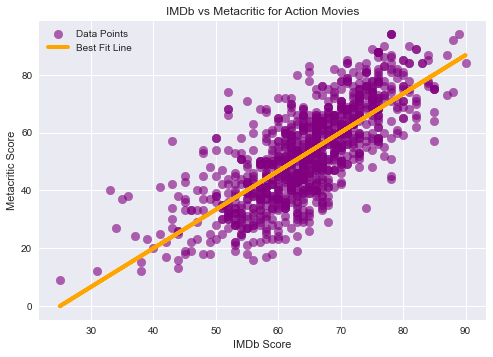

In [7]:
# IMDb vs. Metacritic Action
# Create linear regression object
IMDb_Metacritic_Action = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Action.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Action.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Action Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

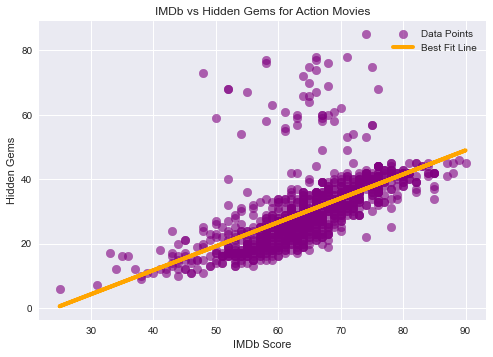

In [8]:
# IMDb vs. Hidden Gems Action
# Create linear regression object
IMDb_Hidden_Gems_Action = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Action.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Action.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Action Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [9]:
# Drama
Score_Genre_df_Drama = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'DRAMA'])
Score_Genre_df_Drama = Score_Genre_df_Drama[Score_Genre_df_Drama['DRAMA']!= 0]
Score_Genre_df_Drama

,Hidden_Gem_Score,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,DRAMA
Key,,,,,
5,16.0,61.0,8.0,29.0,1
6,25.0,68.0,36.0,48.0,1
8,36.0,75.0,81.0,62.0,1
15,42.0,83.0,89.0,78.0,1
16,37.0,63.0,91.0,70.0,1
...,...,...,...,...,...
9379,43.0,74.0,76.0,63.0,1
9380,26.0,63.0,44.0,51.0,1
9390,69.0,76.0,73.0,66.0,1


In [10]:
# Set DataFrame to Drama columns to lists for best fits
Drama_IMDb_list = Score_Genre_df_Drama['IMDb_Score'].tolist()
Drama_Tomatoes_list = Score_Genre_df_Drama['Rotten_Tomatoes_Score'].tolist()
Drama_Metacritic_list = Score_Genre_df_Drama['Metacritic_Score'].tolist()
Drama_Hidden_Gem_list = Score_Genre_df_Drama['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Drama_IMDb_list, dtype=np.float64)
T = np.array(Drama_Tomatoes_list, dtype=np.float64)
M = np.array(Drama_Metacritic_list, dtype=np.float64)
H = np.array(Drama_Hidden_Gem_list, dtype=np.float64)

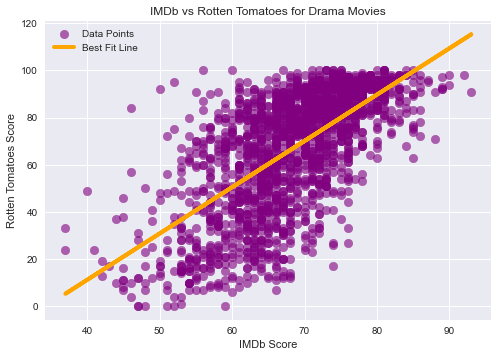

In [11]:
# IMDb vs. Rotten Tomatoes Drama
# Create linear regression object
IMDb_Tomatoes_Drama = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Drama.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Drama.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Drama Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

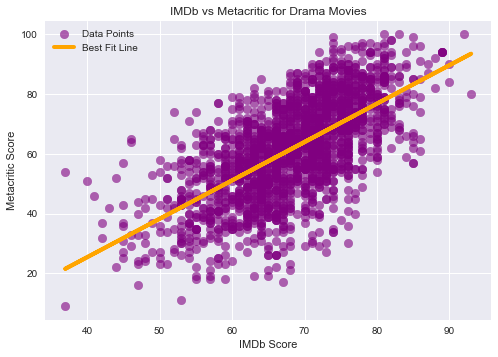

In [12]:
# IMDb vs. Metacritic Drama
# Create linear regression object
IMDb_Metacritic_Drama = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Drama.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Drama.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Drama Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

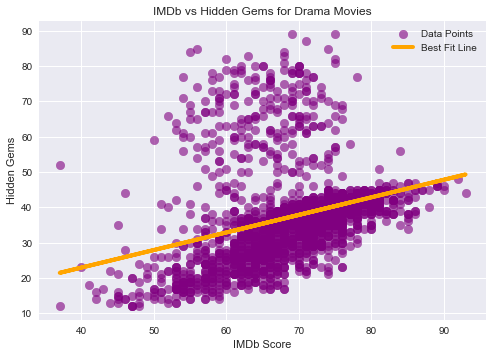

In [13]:
# IMDb vs. Hidden Gems Drama
# Create linear regression object
IMDb_Hidden_Gems_Drama = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Drama.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Drama.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Drama Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [14]:
# Science-Fiction
Score_Genre_df_SciFi = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'SCI_FI'])
Score_Genre_df_SciFi = Score_Genre_df_SciFi[Score_Genre_df_SciFi['SCI_FI']!= 0]
Score_Genre_df_SciFi

,Hidden_Gem_Score,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,SCI_FI
Key,,,,,
21,24.0,58.0,39.0,49.0,1
35,31.0,65.0,68.0,52.0,1
37,29.0,53.0,68.0,53.0,1
50,41.0,80.0,89.0,74.0,1
78,42.0,85.0,93.0,75.0,1
...,...,...,...,...,...
9389,34.0,62.0,76.0,67.0,1
9405,40.0,76.0,89.0,73.0,1
9412,12.0,44.0,4.0,26.0,1


In [15]:
# Set DataFrame to SciF columns to lists for best fits
SciFi_IMDb_list = Score_Genre_df_SciFi['IMDb_Score'].tolist()
SciFi_Tomatoes_list = Score_Genre_df_SciFi['Rotten_Tomatoes_Score'].tolist()
SciFi_Metacritic_list = Score_Genre_df_SciFi['Metacritic_Score'].tolist()
SciFi_Hidden_Gem_list = Score_Genre_df_SciFi['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(SciFi_IMDb_list, dtype=np.float64)
T = np.array(SciFi_Tomatoes_list, dtype=np.float64)
M = np.array(SciFi_Metacritic_list, dtype=np.float64)
H = np.array(SciFi_Hidden_Gem_list, dtype=np.float64)

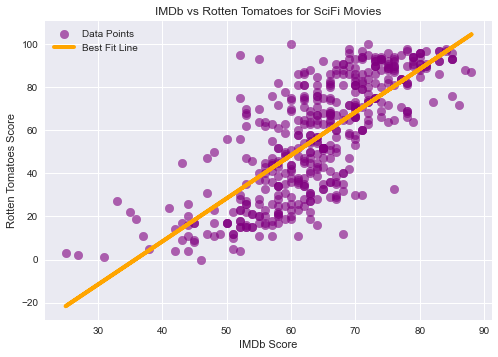

In [16]:
# IMDb vs. Rotten Tomatoes SciFi
# Create linear regression object
IMDb_Tomatoes_SciFi = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_SciFi.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_SciFi.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for SciFi Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

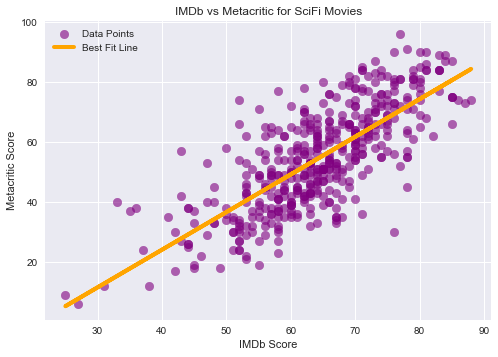

In [17]:
# IMDb vs. Metacritic SciFi
# Create linear regression object
IMDb_Metacritic_SciFi = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_SciFi.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_SciFi.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for SciFi Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

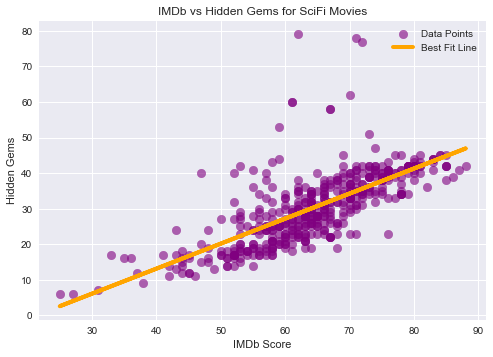

In [18]:
# IMDb vs. Hidden Gems SciFi
# Create linear regression object
IMDb_Hidden_Gems_SciFi = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_SciFi.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_SciFi.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for SciFi Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [19]:
# Thriller
Score_Genre_df_Thriller = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'THRILLER'])
Score_Genre_df_Thriller = Score_Genre_df_Thriller[Score_Genre_df_Thriller['THRILLER']!= 0]
Score_Genre_df_Thriller

,Hidden_Gem_Score,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,THRILLER
Key,,,,,
5,16.0,61.0,8.0,29.0,1
6,25.0,68.0,36.0,48.0,1
15,42.0,83.0,89.0,78.0,1
16,37.0,63.0,91.0,70.0,1
25,36.0,68.0,80.0,69.0,1
...,...,...,...,...,...
9363,35.0,66.0,79.0,66.0,1
9379,43.0,74.0,76.0,63.0,1
9392,43.0,74.0,91.0,95.0,1


In [20]:
# Set DataFrame to Thriller columns to lists for best fits
Thriller_IMDb_list = Score_Genre_df_Thriller['IMDb_Score'].tolist()
Thriller_Tomatoes_list = Score_Genre_df_Thriller['Rotten_Tomatoes_Score'].tolist()
Thriller_Metacritic_list = Score_Genre_df_Thriller['Metacritic_Score'].tolist()
Thriller_Hidden_Gem_list = Score_Genre_df_Thriller['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Thriller_IMDb_list, dtype=np.float64)
T = np.array(Thriller_Tomatoes_list, dtype=np.float64)
M = np.array(Thriller_Metacritic_list, dtype=np.float64)
H = np.array(Thriller_Hidden_Gem_list, dtype=np.float64)

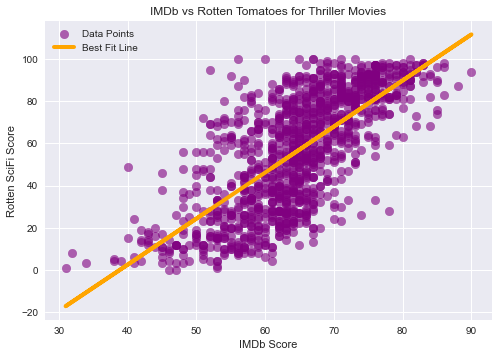

In [21]:
# IMDb vs. Rotten Tomatoes Thriller
# Create linear regression object
IMDb_Tomatoes_Thriller = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Thriller.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Thriller.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Thriller Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten SciFi Score')
plt.legend()
plt.show()

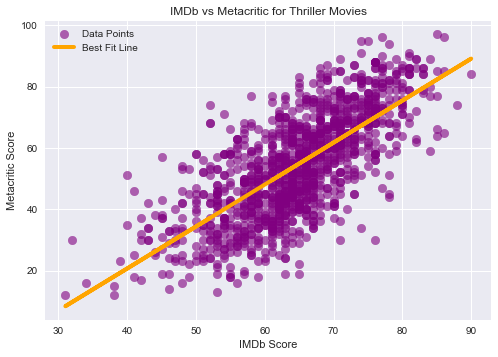

In [22]:
# IMDb vs. Metacritic Thriller
# Create linear regression object
IMDb_Metacritic_Thriller = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Thriller.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Thriller.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Thriller Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

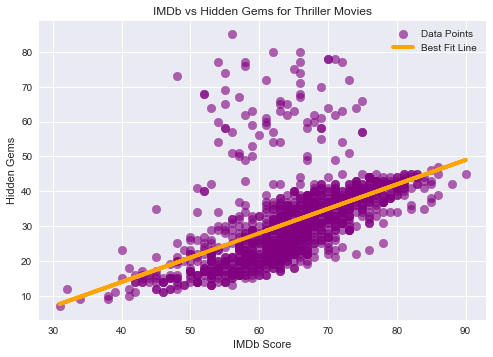

In [23]:
# IMDb vs. Hidden Gems Thriller
# Create linear regression object
IMDb_Hidden_Gems_Thriller = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Thriller.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Thriller.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Thriller Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [24]:
# Mystery
Score_Genre_df_Mystery = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'MYSTERY'])
Score_Genre_df_Mystery = Score_Genre_df_Mystery[Score_Genre_df_Mystery['MYSTERY']!= 0]
Score_Genre_df_Mystery

,Hidden_Gem_Score,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,MYSTERY
Key,,,,,
16,37.0,63.0,91.0,70.0,1
34,39.0,74.0,89.0,69.0,1
35,31.0,65.0,68.0,52.0,1
50,41.0,80.0,89.0,74.0,1
132,16.0,61.0,4.0,28.0,1
...,...,...,...,...,...
9291,23.0,40.0,49.0,51.0,1
9345,40.0,68.0,89.0,84.0,1
9363,35.0,66.0,79.0,66.0,1


In [25]:
# Set DataFrame to Mystery columns to lists for best fits
Mystery_IMDb_list = Score_Genre_df_Mystery['IMDb_Score'].tolist()
Mystery_Tomatoes_list = Score_Genre_df_Mystery['Rotten_Tomatoes_Score'].tolist()
Mystery_Metacritic_list = Score_Genre_df_Mystery['Metacritic_Score'].tolist()
Mystery_Hidden_Gem_list = Score_Genre_df_Mystery['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Mystery_IMDb_list, dtype=np.float64)
T = np.array(Mystery_Tomatoes_list, dtype=np.float64)
M = np.array(Mystery_Metacritic_list, dtype=np.float64)
H = np.array(Mystery_Hidden_Gem_list, dtype=np.float64)

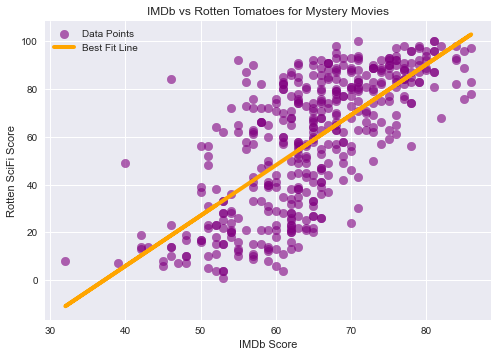

In [26]:
# IMDb vs. Rotten Tomatoes Mystery
# Create linear regression object
IMDb_Tomatoes_Mystery = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Mystery.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Mystery.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Mystery Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten SciFi Score')
plt.legend()
plt.show()

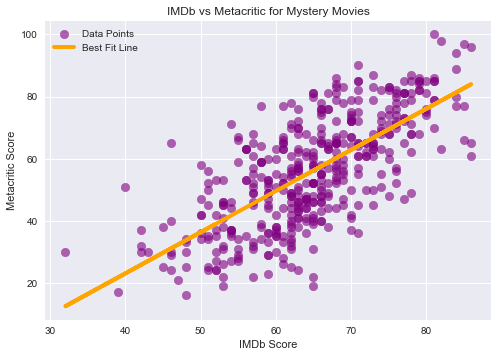

In [27]:
# IMDb vs. Metacritic Mystery
# Create linear regression object
IMDb_Metacritic_Mystery = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Mystery.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Mystery.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Mystery Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

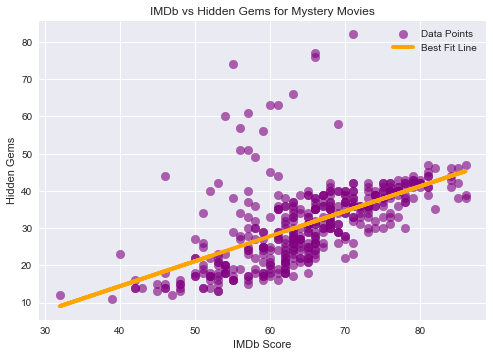

In [28]:
# IMDb vs. Hidden Gems Mystery
# Create linear regression object
IMDb_Hidden_Gems_Mystery = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Mystery.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Mystery.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Mystery Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [29]:
# History
Score_Genre_df_History = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'HISTORY'])
Score_Genre_df_History = Score_Genre_df_History[Score_Genre_df_History['HISTORY']!= 0]
Score_Genre_df_History

,Hidden_Gem_Score,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,HISTORY
Key,,,,,
6,25.0,68.0,36.0,48.0,1
25,36.0,68.0,80.0,69.0,1
40,16.0,51.0,9.0,34.0,1
53,28.0,66.0,50.0,54.0,1
54,45.0,81.0,95.0,96.0,1
...,...,...,...,...,...
9039,36.0,72.0,74.0,72.0,1
9077,33.0,72.0,63.0,65.0,1
9262,30.0,73.0,57.0,51.0,1


In [30]:
# Set DataFrame to History columns to lists for best fits
History_IMDb_list = Score_Genre_df_History['IMDb_Score'].tolist()
History_Tomatoes_list = Score_Genre_df_History['Rotten_Tomatoes_Score'].tolist()
History_Metacritic_list = Score_Genre_df_History['Metacritic_Score'].tolist()
History_Hidden_Gem_list = Score_Genre_df_History['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(History_IMDb_list, dtype=np.float64)
T = np.array(History_Tomatoes_list, dtype=np.float64)
M = np.array(History_Metacritic_list, dtype=np.float64)
H = np.array(History_Hidden_Gem_list, dtype=np.float64)

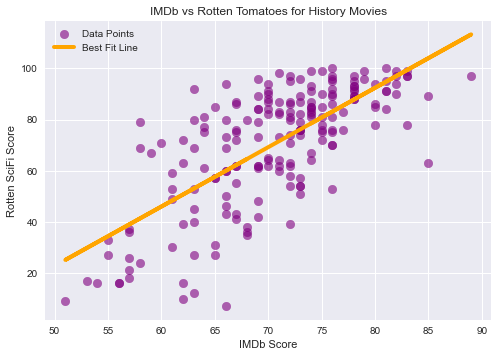

In [31]:
# IMDb vs. Rotten Tomatoes History
# Create linear regression object
IMDb_Tomatoes_History = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_History.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_History.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for History Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten SciFi Score')
plt.legend()
plt.show()

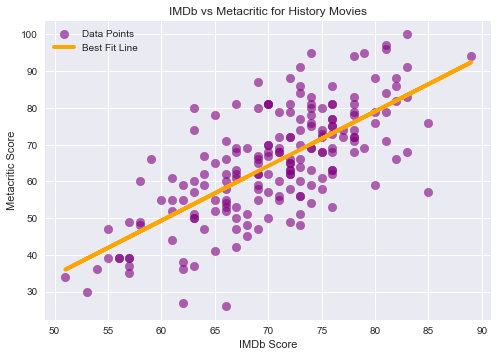

In [32]:
# IMDb vs. Metacritic History
# Create linear regression object
IMDb_Metacritic_History = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_History.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_History.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for History Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

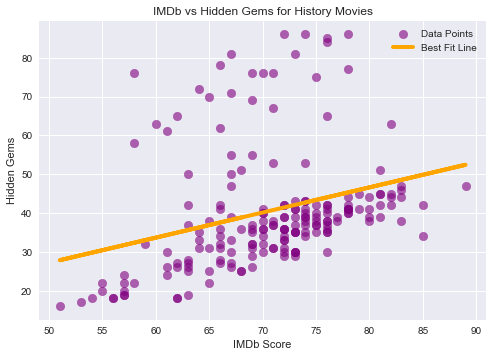

In [33]:
# IMDb vs. Hidden Gems History
# Create linear regression object
IMDb_Hidden_Gems_History = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_History.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_History.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for History Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [34]:
# Crime
Score_Genre_df_Crime = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'CRIME'])
Score_Genre_df_Crime = Score_Genre_df_Crime[Score_Genre_df_Crime['CRIME']!= 0]
Score_Genre_df_Crime

,Hidden_Gem_Score,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,CRIME
Key,,,,,
5,16.0,61.0,8.0,29.0,1
6,25.0,68.0,36.0,48.0,1
16,37.0,63.0,91.0,70.0,1
25,36.0,68.0,80.0,69.0,1
51,21.0,56.0,30.0,38.0,1
...,...,...,...,...,...
9299,27.0,67.0,46.0,47.0,1
9305,17.0,45.0,17.0,37.0,1
9345,40.0,68.0,89.0,84.0,1


In [35]:
# Set DataFrame to Crime columns to lists for best fits
Crime_IMDb_list = Score_Genre_df_Crime['IMDb_Score'].tolist()
Crime_Tomatoes_list = Score_Genre_df_Crime['Rotten_Tomatoes_Score'].tolist()
Crime_Metacritic_list = Score_Genre_df_Crime['Metacritic_Score'].tolist()
Crime_Hidden_Gem_list = Score_Genre_df_Crime['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Crime_IMDb_list, dtype=np.float64)
T = np.array(Crime_Tomatoes_list, dtype=np.float64)
M = np.array(Crime_Metacritic_list, dtype=np.float64)
H = np.array(Crime_Hidden_Gem_list, dtype=np.float64)

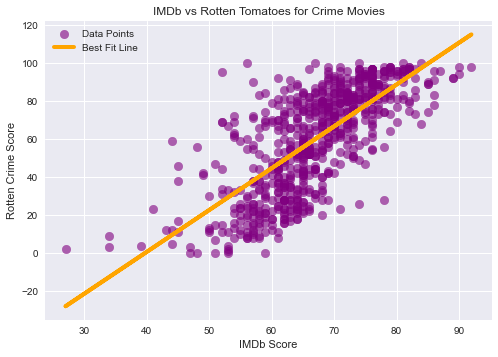

In [36]:
# IMDb vs. Rotten Tomatoes Crime
# Create linear regression object
IMDb_Tomatoes_Crime = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Crime.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Crime.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Crime Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Crime Score')
plt.legend()
plt.show()

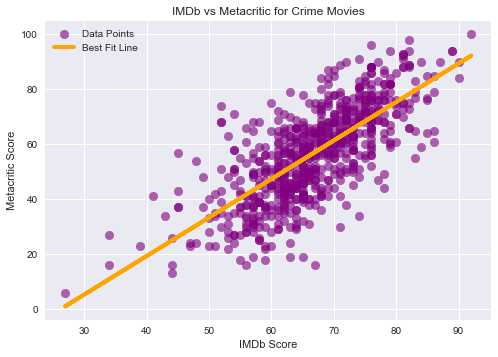

In [37]:
# IMDb vs. Metacritic Crime
# Create linear regression object
IMDb_Metacritic_Crime = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Crime.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Crime.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Crime Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

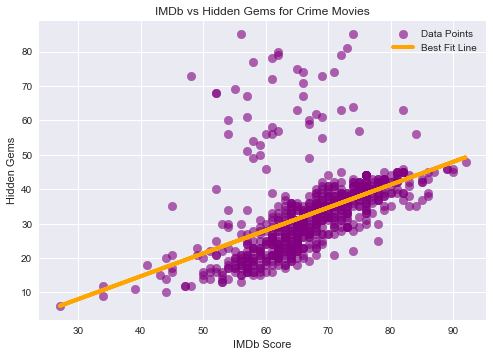

In [38]:
# IMDb vs. Hidden Gems Crime
# Create linear regression object
IMDb_Hidden_Gems_Crime = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Crime.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Crime.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Crime Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [39]:
# Adventure
Score_Genre_df_Adventure = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'ADVENTURE'])
Score_Genre_df_Adventure = Score_Genre_df_Adventure[Score_Genre_df_Adventure['ADVENTURE']!= 0]
Score_Genre_df_Adventure

,Hidden_Gem_Score,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,ADVENTURE
Key,,,,,
21,24.0,58.0,39.0,49.0,1
35,31.0,65.0,68.0,52.0,1
36,22.0,50.0,40.0,45.0,1
37,29.0,53.0,68.0,53.0,1
40,16.0,51.0,9.0,34.0,1
...,...,...,...,...,...
9389,34.0,62.0,76.0,67.0,1
9405,40.0,76.0,89.0,73.0,1
9406,32.0,67.0,68.0,55.0,1


In [40]:
# Set DataFrame to Adventure columns to lists for best fits
Adventure_IMDb_list = Score_Genre_df_Adventure['IMDb_Score'].tolist()
Adventure_Tomatoes_list = Score_Genre_df_Adventure['Rotten_Tomatoes_Score'].tolist()
Adventure_Metacritic_list = Score_Genre_df_Adventure['Metacritic_Score'].tolist()
Adventure_Hidden_Gem_list = Score_Genre_df_Adventure['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Adventure_IMDb_list, dtype=np.float64)
T = np.array(Adventure_Tomatoes_list, dtype=np.float64)
M = np.array(Adventure_Metacritic_list, dtype=np.float64)
H = np.array(Adventure_Hidden_Gem_list, dtype=np.float64)

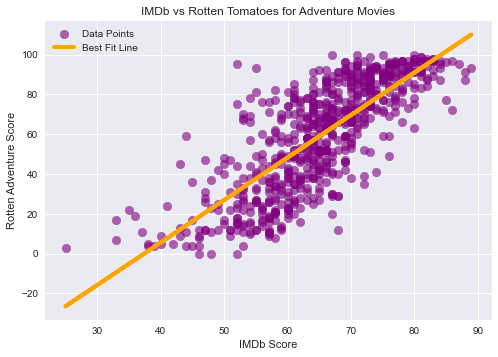

In [41]:
# IMDb vs. Rotten Tomatoes Adventure
# Create linear regression object
IMDb_Tomatoes_Adventure = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Adventure.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Adventure.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Adventure Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Adventure Score')
plt.legend()
plt.show()

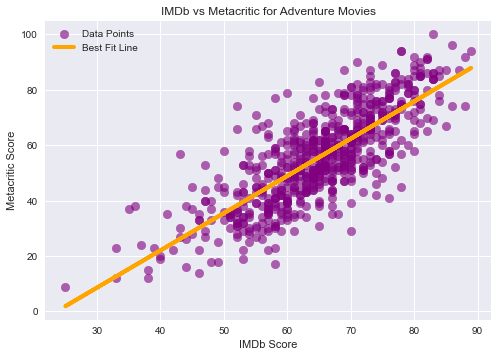

In [42]:
# IMDb vs. Metacritic Adventure
# Create linear regression object
IMDb_Metacritic_Adventure = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Adventure.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Adventure.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Adventure Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

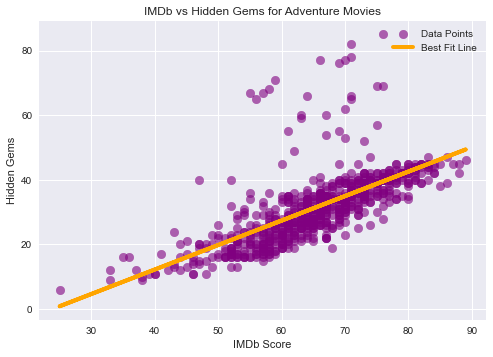

In [43]:
# IMDb vs. Hidden Gems Adventure
# Create linear regression object
IMDb_Hidden_Gems_Adventure = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Adventure.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Adventure.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Adventure Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [44]:
# Animation
Score_Genre_df_Animation = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'ANIMATION'])
Score_Genre_df_Animation = Score_Genre_df_Animation[Score_Genre_df_Animation['ANIMATION']!= 0]
Score_Genre_df_Animation

,Hidden_Gem_Score,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,ANIMATION
Key,,,,,
224,52.0,73.0,81.0,65.0,1
272,45.0,69.0,96.0,79.0,1
327,35.0,70.0,81.0,61.0,1
445,27.0,68.0,44.0,50.0,1
478,18.0,52.0,18.0,36.0,1
...,...,...,...,...,...
9267,23.0,59.0,34.0,45.0,1
9324,16.0,46.0,12.0,35.0,1
9357,44.0,84.0,98.0,79.0,1


In [45]:
# Set DataFrame to Animation columns to lists for best fits
Animation_IMDb_list = Score_Genre_df_Adventure['IMDb_Score'].tolist()
Animation_Tomatoes_list = Score_Genre_df_Adventure['Rotten_Tomatoes_Score'].tolist()
Animation_Metacritic_list = Score_Genre_df_Adventure['Metacritic_Score'].tolist()
Animation_Hidden_Gem_list = Score_Genre_df_Adventure['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Animation_IMDb_list, dtype=np.float64)
T = np.array(Animation_Tomatoes_list, dtype=np.float64)
M = np.array(Animation_Metacritic_list, dtype=np.float64)
H = np.array(Animation_Hidden_Gem_list, dtype=np.float64)

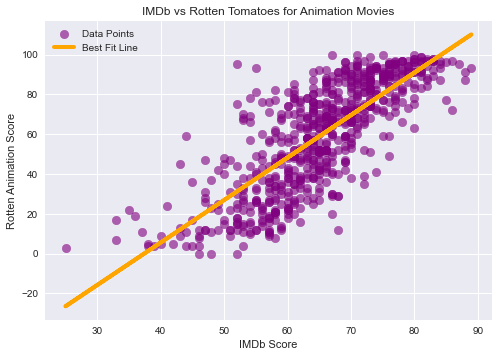

In [46]:
# IMDb vs. Rotten Tomatoes Animation
# Create linear regression object
IMDb_Tomatoes_Animation = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Animation.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Animation.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Animation Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Animation Score')
plt.legend()
plt.show()

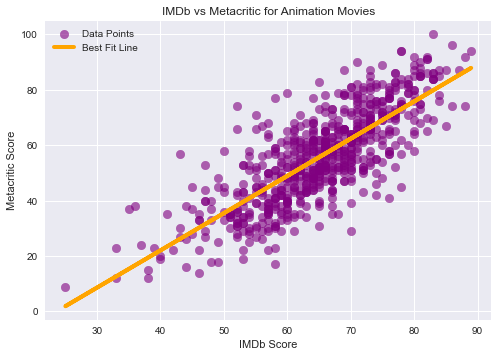

In [47]:
# IMDb vs. Metacritic Animation
# Create linear regression object
IMDb_Metacritic_Animation = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Animation.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Animation.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Animation Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

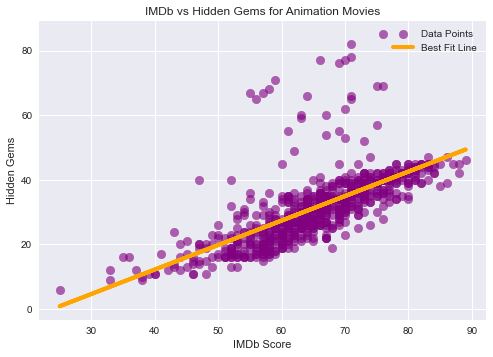

In [48]:
# IMDb vs. Hidden Gems AAnimation
# Create linear regression object
IMDb_Hidden_Gems_Animation = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Animation.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Animation.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Animation Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [49]:
# Comedy
Score_Genre_df_Comedy = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'COMEDY'])
Score_Genre_df_Comedy = Score_Genre_df_Comedy[Score_Genre_df_Comedy['COMEDY']!= 0]
Score_Genre_df_Comedy

,Hidden_Gem_Score,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,COMEDY
Key,,,,,
39,30.0,61.0,60.0,61.0,1
55,55.0,74.0,96.0,77.0,1
58,31.0,62.0,65.0,57.0,1
67,28.0,64.0,56.0,48.0,1
85,41.0,73.0,88.0,83.0,1
...,...,...,...,...,...
9406,32.0,67.0,68.0,55.0,1
9410,16.0,52.0,14.0,30.0,1
9411,31.0,65.0,63.0,61.0,1


In [50]:
# Set DataFrame to Comedy columns to lists for best fits
Comedy_IMDb_list = Score_Genre_df_Comedy['IMDb_Score'].tolist()
Comedy_Tomatoes_list = Score_Genre_df_Comedy['Rotten_Tomatoes_Score'].tolist()
Comedy_Metacritic_list = Score_Genre_df_Comedy['Metacritic_Score'].tolist()
Comedy_Hidden_Gem_list = Score_Genre_df_Comedy['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Comedy_IMDb_list, dtype=np.float64)
T = np.array(Comedy_Tomatoes_list, dtype=np.float64)
M = np.array(Comedy_Metacritic_list, dtype=np.float64)
H = np.array(Comedy_Hidden_Gem_list, dtype=np.float64)

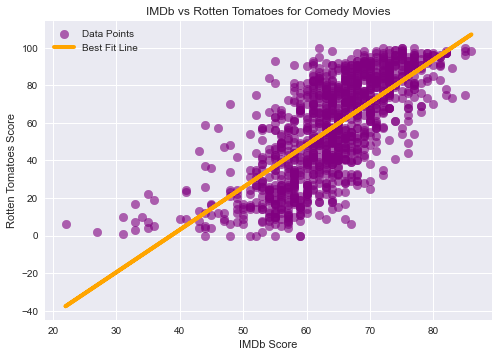

In [51]:
# IMDb vs. Rotten Tomatoes Comedy
# Create linear regression object
IMDb_Tomatoes_Comedy = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Comedy.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Comedy.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Comedy Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

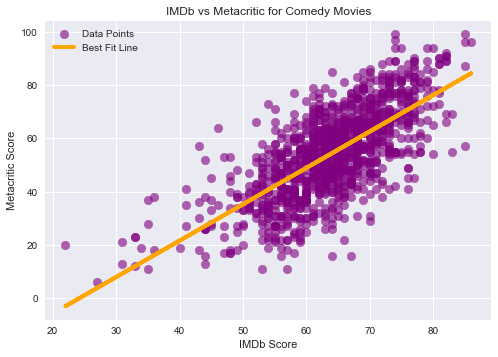

In [52]:
# IMDb vs. Metacritic Comedy
# Create linear regression object
IMDb_Metacritic_Comedy = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Comedy.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Comedy.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Comedy Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

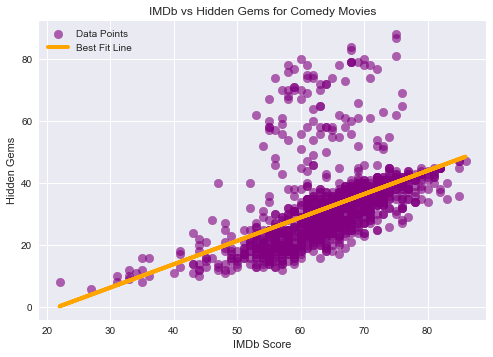

In [53]:
# IMDb vs. Hidden Gems Comedy
# Create linear regression object
IMDb_Hidden_Gems_Comedy = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Comedy.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Comedy.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Comedy Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [54]:
# Romance
Score_Genre_df_Romance = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'ROMANCE'])
Score_Genre_df_Romance = Score_Genre_df_Romance[Score_Genre_df_Romance['ROMANCE']!= 0]
Score_Genre_df_Romance

,Hidden_Gem_Score,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,ROMANCE
Key,,,,,
39,30.0,61.0,60.0,61.0,1
58,31.0,62.0,65.0,57.0,1
67,28.0,64.0,56.0,48.0,1
94,25.0,61.0,41.0,47.0,1
99,71.0,59.0,80.0,56.0,1
...,...,...,...,...,...
9357,44.0,84.0,98.0,79.0,1
9368,32.0,67.0,70.0,57.0,1
9385,31.0,65.0,65.0,56.0,1


In [55]:
# Set DataFrame to Romance columns to lists for best fits
Romance_IMDb_list = Score_Genre_df_Romance['IMDb_Score'].tolist()
Romance_Tomatoes_list = Score_Genre_df_Romance['Rotten_Tomatoes_Score'].tolist()
Romance_Metacritic_list = Score_Genre_df_Romance['Metacritic_Score'].tolist()
Romance_Hidden_Gem_list = Score_Genre_df_Romance['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Romance_IMDb_list, dtype=np.float64)
T = np.array(Romance_Tomatoes_list, dtype=np.float64)
M = np.array(Romance_Metacritic_list, dtype=np.float64)
H = np.array(Romance_Hidden_Gem_list, dtype=np.float64)

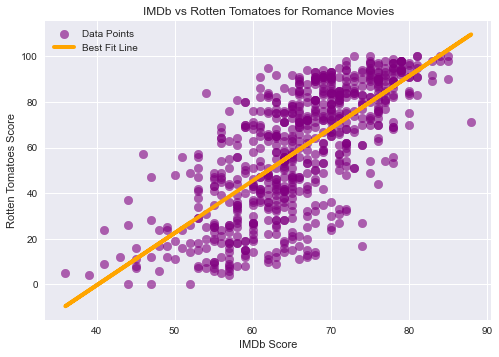

In [56]:
# IMDb vs. Rotten Tomatoes Romance
# Create linear regression object
IMDb_Tomatoes_Romance = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Romance.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Romance.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Romance Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

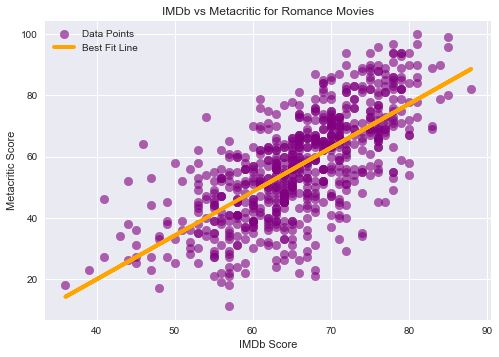

In [57]:
# IMDb vs. Metacritic Romance
# Create linear regression object
IMDb_Metacritic_Romance = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Romance.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Romance.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Romance Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

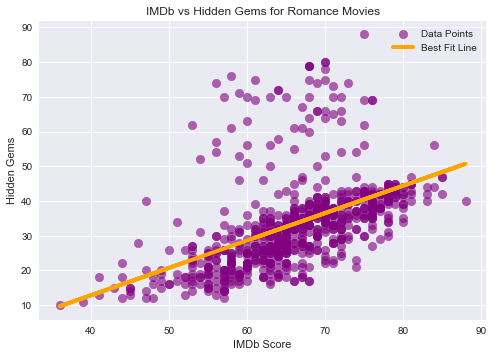

In [58]:
# IMDb vs. Hidden Gems Romance
# Create linear regression object
IMDb_Hidden_Gems_Romance = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Romance.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Romance.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Romance Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [59]:
# Sport
Score_Genre_df_Sport = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'SPORT'])
Score_Genre_df_Sport = Score_Genre_df_Sport [Score_Genre_df_Sport ['SPORT']!= 0]
Score_Genre_df_Sport 

,Hidden_Gem_Score,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,SPORT
Key,,,,,
8,36.0,75.0,81.0,62.0,1
67,28.0,64.0,56.0,48.0,1
260,40.0,69.0,92.0,76.0,1
418,34.0,68.0,68.0,65.0,1
419,34.0,68.0,68.0,65.0,1
...,...,...,...,...,...
9062,29.0,71.0,48.0,53.0,1
9164,21.0,67.0,20.0,41.0,1
9190,35.0,68.0,76.0,65.0,1


In [60]:
# Set DataFrame to Sport columns to lists for best fits
Sport_IMDb_list = Score_Genre_df_Sport['IMDb_Score'].tolist()
Sport_Tomatoes_list = Score_Genre_df_Sport['Rotten_Tomatoes_Score'].tolist()
Sport_Metacritic_list = Score_Genre_df_Sport['Metacritic_Score'].tolist()
Sport_Hidden_Gem_list = Score_Genre_df_Sport['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Sport_IMDb_list, dtype=np.float64)
T = np.array(Sport_Tomatoes_list, dtype=np.float64)
M = np.array(Sport_Metacritic_list, dtype=np.float64)
H = np.array(Sport_Hidden_Gem_list, dtype=np.float64)

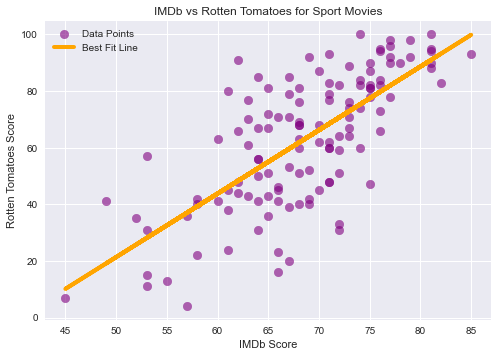

In [61]:
# IMDb vs. Rotten Tomatoes Sport
# Create linear regression object
IMDb_Tomatoes_Sport = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Sport.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Sport.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Sport Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

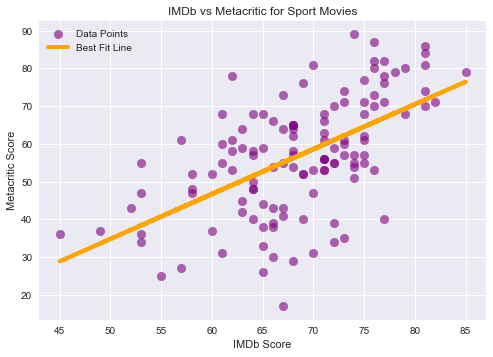

In [62]:
# IMDb vs. Metacritic Sport
# Create linear regression object
IMDb_Metacritic_Sport = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Sport.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Sport.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Sport Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

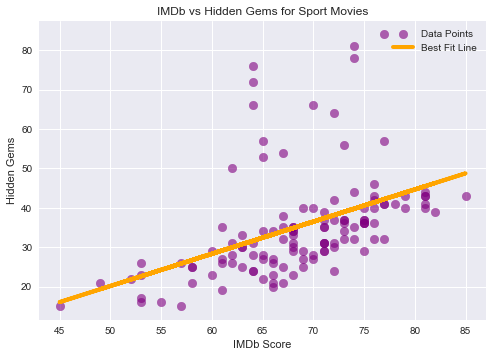

In [63]:
# IMDb vs. Hidden Gems Sport
# Create linear regression object
IMDb_Hidden_Gems_Sport = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Sport.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Sport.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Sport Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [64]:
# Horror
Score_Genre_df_Horror = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'HORROR'])
Score_Genre_df_Horror = Score_Genre_df_Horror[Score_Genre_df_Horror['HORROR']!= 0]
Score_Genre_df_Horror

,Hidden_Gem_Score,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,HORROR
Key,,,,,
16,37.0,63.0,91.0,70.0,1
34,39.0,74.0,89.0,69.0,1
35,31.0,65.0,68.0,52.0,1
36,22.0,50.0,40.0,45.0,1
37,29.0,53.0,68.0,53.0,1
...,...,...,...,...,...
9363,35.0,66.0,79.0,66.0,1
9404,27.0,48.0,70.0,44.0,1
9405,40.0,76.0,89.0,73.0,1


In [65]:
# Set DataFrame to Horror columns to lists for best fits
Horror_IMDb_list = Score_Genre_df_Horror['IMDb_Score'].tolist()
Horror_Tomatoes_list = Score_Genre_df_Horror['Rotten_Tomatoes_Score'].tolist()
Horror_Metacritic_list = Score_Genre_df_Horror['Metacritic_Score'].tolist()
Horror_Hidden_Gem_list = Score_Genre_df_Horror['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Horror_IMDb_list, dtype=np.float64)
T = np.array(Horror_Tomatoes_list, dtype=np.float64)
M = np.array(Horror_Metacritic_list, dtype=np.float64)
H = np.array(Horror_Hidden_Gem_list, dtype=np.float64)

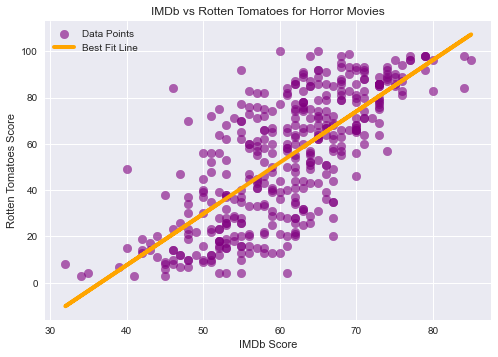

In [66]:
# IMDb vs. Rotten Tomatoes Horror
# Create linear regression object
IMDb_Tomatoes_Horror = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Horror.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Horror.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Horror Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

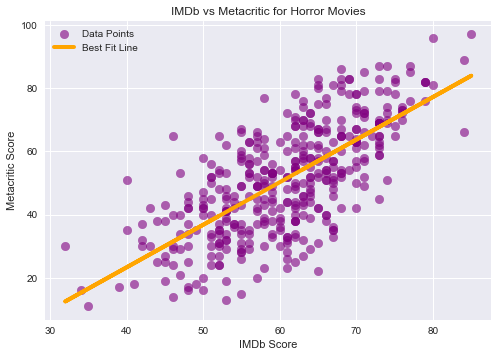

In [67]:
# IMDb vs. Metacritic Horror
# Create linear regression object
IMDb_Metacritic_Horror = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Horror.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Horror.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Horror Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

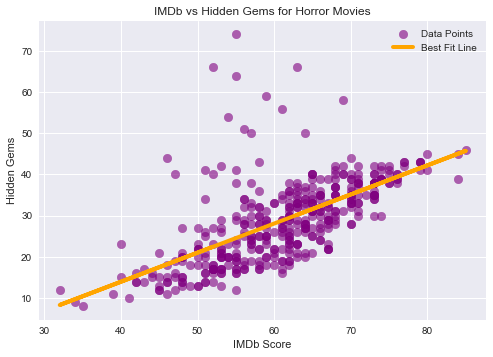

In [68]:
# IMDb vs. Hidden Gems Horror
# Create linear regression object
IMDb_Hidden_Gems_Horror = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Horror.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Horror.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Horror Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [69]:
# Documentary
Score_Genre_df_Documentary = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'DOCUMENTARY'])
Score_Genre_df_Documentary = Score_Genre_df_Documentary[Score_Genre_df_Documentary['DOCUMENTARY']!= 0]
Score_Genre_df_Documentary

,Hidden_Gem_Score,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,DOCUMENTARY
Key,,,,,
63,44.0,83.0,97.0,83.0,1
80,43.0,74.0,99.0,83.0,1
251,81.0,73.0,76.0,70.0,1
460,76.0,66.0,69.0,70.0,1
490,38.0,69.0,82.0,78.0,1
...,...,...,...,...,...
9107,84.0,75.0,94.0,80.0,1
9124,40.0,76.0,89.0,75.0,1
9204,82.0,54.0,98.0,79.0,1


In [70]:
# Set DataFrame to Documentary columns to lists for best fits
Documentary_IMDb_list = Score_Genre_df_Documentary['IMDb_Score'].tolist()
Documentary_Tomatoes_list = Score_Genre_df_Documentary['Rotten_Tomatoes_Score'].tolist()
Documentary_Metacritic_list = Score_Genre_df_Documentary['Metacritic_Score'].tolist()
Documentary_Hidden_Gem_list = Score_Genre_df_Documentary['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Documentary_IMDb_list, dtype=np.float64)
T = np.array(Documentary_Tomatoes_list, dtype=np.float64)
M = np.array(Documentary_Metacritic_list, dtype=np.float64)
H = np.array(Documentary_Hidden_Gem_list, dtype=np.float64)

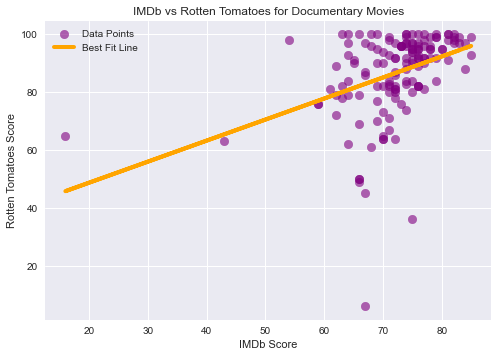

In [71]:
# IMDb vs. Rotten Tomatoes Documentary
# Create linear regression object
IMDb_Tomatoes_Documentary = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Documentary.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Documentary.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Documentary Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

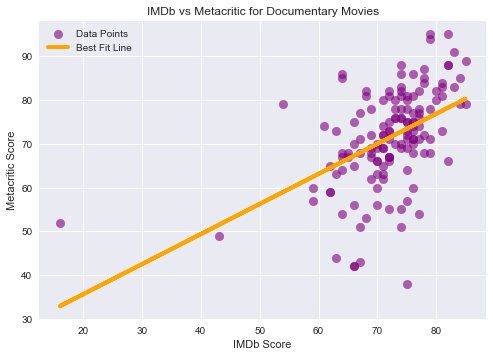

In [72]:
# IMDb vs. Metacritic Documentary
# Create linear regression object
IMDb_Metacritic_Documentary = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Documentary.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Documentary.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Documentary Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

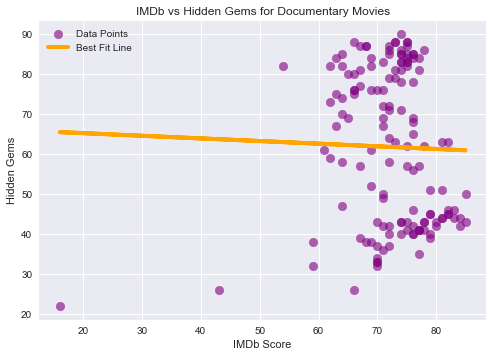

In [73]:
# IMDb vs. Hidden Gems Documentary
# Create linear regression object
IMDb_Hidden_Gems_Documentary = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Documentary.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Documentary.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Documentary Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [74]:
# Western
Score_Genre_df_Western = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'WESTERN'])
Score_Genre_df_Western = Score_Genre_df_Western[Score_Genre_df_Western['WESTERN']!= 0]
Score_Genre_df_Western

,Hidden_Gem_Score,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,WESTERN
Key,,,,,
105,40.0,77.0,89.0,76.0,1
194,41.0,80.0,98.0,65.0,1
244,23.0,61.0,33.0,44.0,1
661,23.0,59.0,32.0,49.0,1
802,35.0,74.0,80.0,55.0,1
...,...,...,...,...,...
8733,42.0,76.0,95.0,80.0,1
8734,46.0,60.0,79.0,75.0,1
8869,44.0,82.0,96.0,85.0,1


In [75]:
# Set DataFrame to Documentary columns to lists for best fits
Western_IMDb_list = Score_Genre_df_Western['IMDb_Score'].tolist()
Western_Tomatoes_list = Score_Genre_df_Western['Rotten_Tomatoes_Score'].tolist()
Western_Metacritic_list = Score_Genre_df_Western['Metacritic_Score'].tolist()
Western_Hidden_Gem_list = Score_Genre_df_Western['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Western_IMDb_list, dtype=np.float64)
T = np.array(Western_Tomatoes_list, dtype=np.float64)
M = np.array(Western_Metacritic_list, dtype=np.float64)
H = np.array(Western_Hidden_Gem_list, dtype=np.float64)

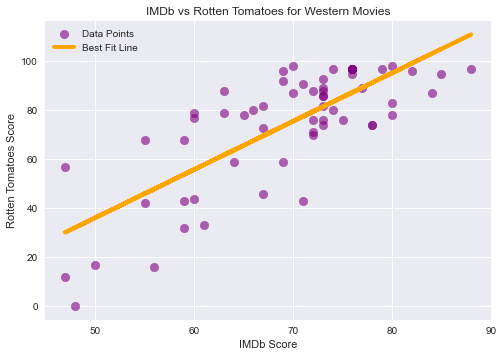

In [76]:
# IMDb vs. Rotten Tomatoes Western
# Create linear regression object
IMDb_Tomatoes_Western = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Western.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Western.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Western Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

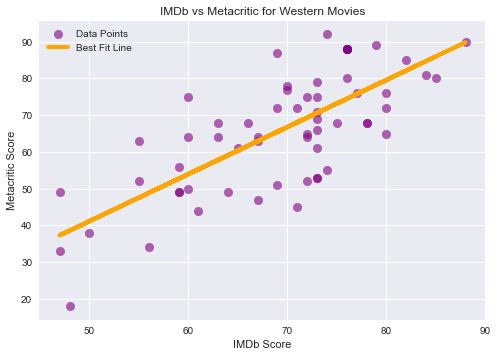

In [77]:
# IMDb vs. Metacritic Western
# Create linear regression object
IMDb_Metacritic_Western = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Western.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Western.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Western Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

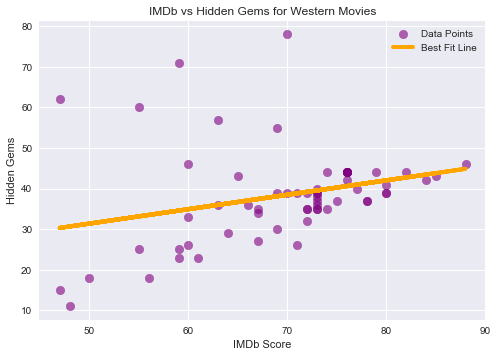

In [78]:
# IMDb vs. Hidden Gems Western
# Create linear regression object
IMDb_Hidden_Gems_Western = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Western.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Western.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Western Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [79]:
# Biography
Score_Genre_df_Biography = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'BIOGRAPHY'])
Score_Genre_df_Biography = Score_Genre_df_Biography[Score_Genre_df_Biography['BIOGRAPHY']!= 0]
Score_Genre_df_Biography

,Hidden_Gem_Score,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,BIOGRAPHY
Key,,,,,
8,36.0,75.0,81.0,62.0,1
54,45.0,81.0,95.0,96.0,1
56,42.0,75.0,93.0,82.0,1
80,43.0,74.0,99.0,83.0,1
160,38.0,82.0,74.0,72.0,1
...,...,...,...,...,...
9232,16.0,55.0,13.0,28.0,1
9262,30.0,73.0,57.0,51.0,1
9273,44.0,84.0,97.0,85.0,1


In [80]:
# Set DataFrame to Biography columns to lists for best fits
Biography_IMDb_list = Score_Genre_df_Biography['IMDb_Score'].tolist()
Biography_Tomatoes_list = Score_Genre_df_Biography['Rotten_Tomatoes_Score'].tolist()
Biography_Metacritic_list = Score_Genre_df_Biography['Metacritic_Score'].tolist()
Biography_Hidden_Gem_list = Score_Genre_df_Biography['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Biography_IMDb_list, dtype=np.float64)
T = np.array(Biography_Tomatoes_list, dtype=np.float64)
M = np.array(Biography_Metacritic_list, dtype=np.float64)
H = np.array(Biography_Hidden_Gem_list, dtype=np.float64)

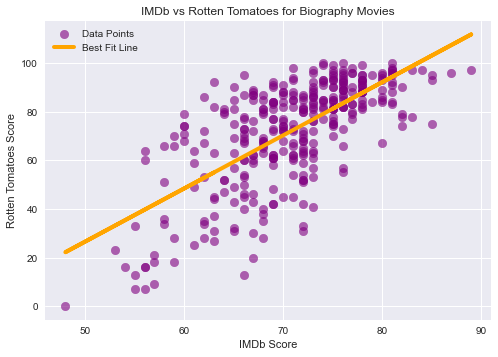

In [81]:
# IMDb vs. Rotten Tomatoes Biography
# Create linear regression object
IMDb_Tomatoes_Biography = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Biography.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Biography.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Biography Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

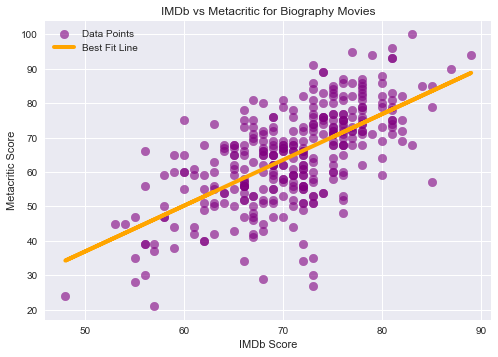

In [82]:
# IMDb vs. Metacritic Biography
# Create linear regression object
IMDb_Metacritic_Biography = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Biography.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Biography.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Biography Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

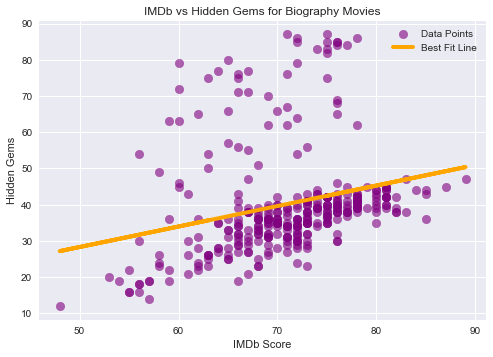

In [83]:
# IMDb vs. Hidden Gems Biography
# Create linear regression object
IMDb_Hidden_Gems_Biography = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Biography.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Biography.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Biography Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [84]:
# Family
Score_Genre_df_Family = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'FAMILY'])
Score_Genre_df_Family = Score_Genre_df_Family[Score_Genre_df_Family['FAMILY']!= 0]
Score_Genre_df_Family

,Hidden_Gem_Score,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,FAMILY
Key,,,,,
179,16.0,59.0,12.0,25.0,1
188,25.0,72.0,35.0,43.0,1
189,29.0,67.0,59.0,50.0,1
203,22.0,58.0,35.0,41.0,1
224,52.0,73.0,81.0,65.0,1
...,...,...,...,...,...
9388,77.0,70.0,75.0,64.0,1
9389,34.0,62.0,76.0,67.0,1
9410,16.0,52.0,14.0,30.0,1


In [85]:
# Set DataFrame to Family columns to lists for best fits
Family_IMDb_list = Score_Genre_df_Family['IMDb_Score'].tolist()
Family_Tomatoes_list = Score_Genre_df_Family['Rotten_Tomatoes_Score'].tolist()
Family_Metacritic_list = Score_Genre_df_Family['Metacritic_Score'].tolist()
Family_Hidden_Gem_list = Score_Genre_df_Family['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Family_IMDb_list, dtype=np.float64)
T = np.array(Family_Tomatoes_list, dtype=np.float64)
M = np.array(Family_Metacritic_list, dtype=np.float64)
H = np.array(Family_Hidden_Gem_list, dtype=np.float64)

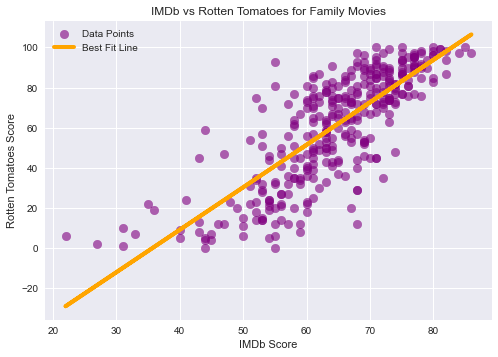

In [86]:
# IMDb vs. Rotten Tomatoes Family
# Create linear regression object
IMDb_Tomatoes_Family = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Family.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Family.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Family Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

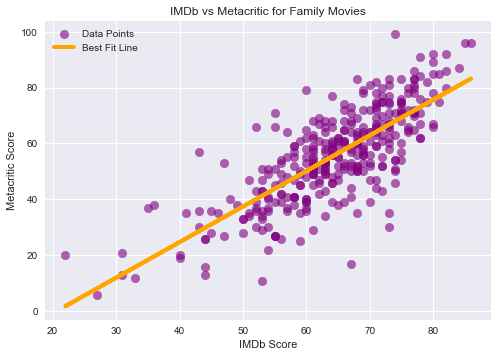

In [87]:
# IMDb vs. Metacritic Family
# Create linear regression object
IMDb_Metacritic_Family = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Family.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Family.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Family Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

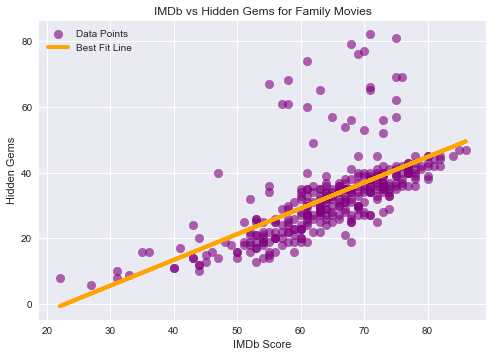

In [88]:
# IMDb vs. Hidden Gems Family
# Create linear regression object
IMDb_Hidden_Gems_Family = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Family.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Family.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Family Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [89]:
# Music
Score_Genre_df_Music = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'MUSIC'])
Score_Genre_df_Music = Score_Genre_df_Music[Score_Genre_df_Music['MUSIC']!= 0]
Score_Genre_df_Music

,Hidden_Gem_Score,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,MUSIC
Key,,,,,
80,43.0,74.0,99.0,83.0,1
149,37.0,71.0,75.0,77.0,1
150,36.0,71.0,79.0,64.0,1
252,16.0,63.0,9.0,26.0,1
279,42.0,76.0,90.0,88.0,1
...,...,...,...,...,...
9178,41.0,79.0,94.0,75.0,1
9183,35.0,76.0,77.0,56.0,1
9216,41.0,72.0,92.0,80.0,1


In [90]:
# Set DataFrame to Music columns to lists for best fits
Music_IMDb_list = Score_Genre_df_Music['IMDb_Score'].tolist()
Music_Tomatoes_list = Score_Genre_df_Music['Rotten_Tomatoes_Score'].tolist()
Music_Metacritic_list = Score_Genre_df_Music['Metacritic_Score'].tolist()
Music_Hidden_Gem_list = Score_Genre_df_Music['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Music_IMDb_list, dtype=np.float64)
T = np.array(Music_Tomatoes_list, dtype=np.float64)
M = np.array(Music_Metacritic_list, dtype=np.float64)
H = np.array(Music_Hidden_Gem_list, dtype=np.float64)

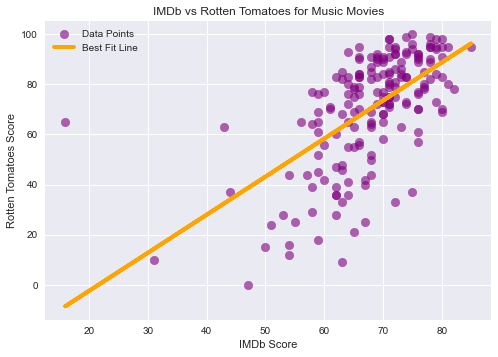

In [91]:
# IMDb vs. Rotten Tomatoes Music
# Create linear regression object
IMDb_Tomatoes_Music = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Music.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Music.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Music Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

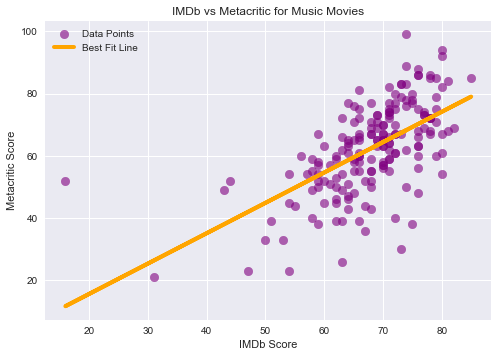

In [92]:
# IMDb vs. Metacritic Music
# Create linear regression object
IMDb_Metacritic_Music = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Music.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Music.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Music Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

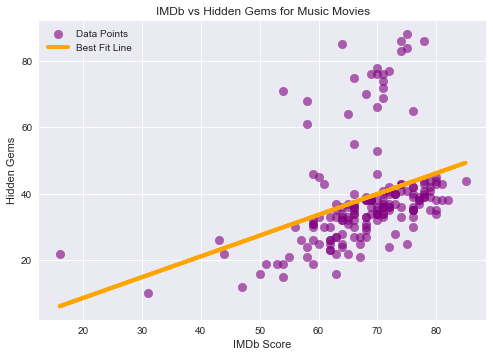

In [93]:
# IMDb vs. Hidden Gems Music
# Create linear regression object
IMDb_Hidden_Gems_Music = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Music.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Music.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Music Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [94]:
# Musical
Score_Genre_df_Musical = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'MUSICAL'])
Score_Genre_df_Musical = Score_Genre_df_Musical[Score_Genre_df_Musical['MUSICAL']!= 0]
Score_Genre_df_Musical

,Hidden_Gem_Score,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,MUSICAL
Key,,,,,
150,36.0,71.0,79.0,64.0,1
445,27.0,68.0,44.0,50.0,1
553,36.0,72.0,86.0,61.0,1
586,41.0,75.0,96.0,77.0,1
593,33.0,60.0,77.0,63.0,1
...,...,...,...,...,...
8612,64.0,65.0,55.0,58.0,1
8726,32.0,65.0,75.0,55.0,1
8727,30.0,61.0,70.0,51.0,1


In [95]:
# Set DataFrame to Musical columns to lists for best fits
Musical_IMDb_list = Score_Genre_df_Musical['IMDb_Score'].tolist()
Musical_Tomatoes_list = Score_Genre_df_Musical['Rotten_Tomatoes_Score'].tolist()
Musical_Metacritic_list = Score_Genre_df_Musical['Metacritic_Score'].tolist()
Musical_Hidden_Gem_list = Score_Genre_df_Musical['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Musical_IMDb_list, dtype=np.float64)
T = np.array(Musical_Tomatoes_list, dtype=np.float64)
M = np.array(Musical_Metacritic_list, dtype=np.float64)
H = np.array(Musical_Hidden_Gem_list, dtype=np.float64)

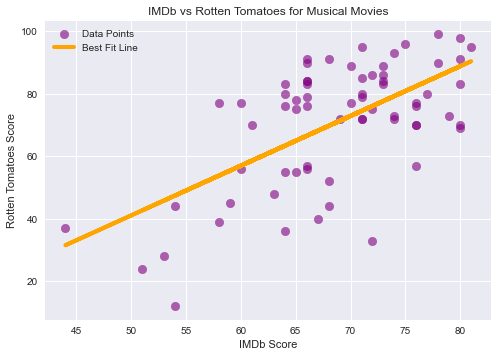

In [96]:
# IMDb vs. Rotten Tomatoes Musical
# Create linear regression object
IMDb_Tomatoes_Musical = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Musical.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Musical.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Musical Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

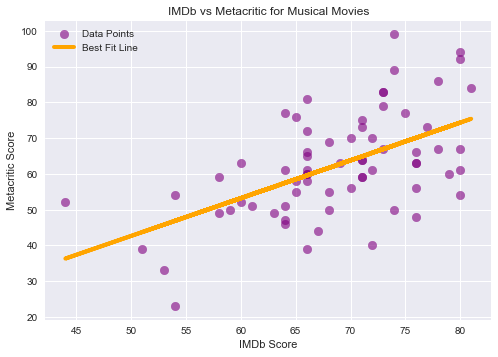

In [97]:
# IMDb vs. Metacritic Musical
# Create linear regression object
IMDb_Metacritic_Musical = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Musical.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Musical.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Musical Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

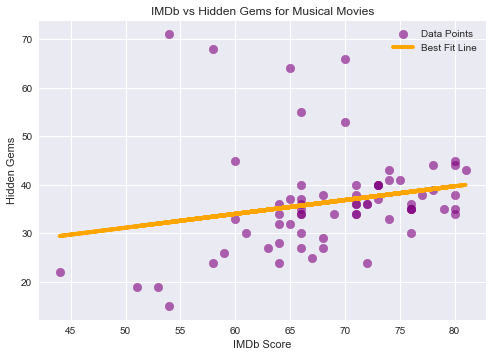

In [98]:
# IMDb vs. Hidden Gems Musical
# Create linear regression object
IMDb_Hidden_Gems_Musical = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Musical.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Musical.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Musical Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [99]:
# Fantasy
Score_Genre_df_Fantasy = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'FANTASY'])
Score_Genre_df_Fantasy = Score_Genre_df_Fantasy[Score_Genre_df_Fantasy['FANTASY']!= 0]
Score_Genre_df_Fantasy

,Hidden_Gem_Score,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,FANTASY
Key,,,,,
35,31.0,65.0,68.0,52.0,1
36,22.0,50.0,40.0,45.0,1
37,29.0,53.0,68.0,53.0,1
40,16.0,51.0,9.0,34.0,1
58,31.0,62.0,65.0,57.0,1
...,...,...,...,...,...
9389,34.0,62.0,76.0,67.0,1
9405,40.0,76.0,89.0,73.0,1
9410,16.0,52.0,14.0,30.0,1


In [100]:
# Set DataFrame to Fantasy columns to lists for best fits
Fantasy_IMDb_list = Score_Genre_df_Fantasy['IMDb_Score'].tolist()
Fantasy_Tomatoes_list = Score_Genre_df_Fantasy['Rotten_Tomatoes_Score'].tolist()
Fantasy_Metacritic_list = Score_Genre_df_Fantasy['Metacritic_Score'].tolist()
Fantasy_Hidden_Gem_list = Score_Genre_df_Fantasy['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Fantasy_IMDb_list, dtype=np.float64)
T = np.array(Fantasy_Tomatoes_list, dtype=np.float64)
M = np.array(Fantasy_Metacritic_list, dtype=np.float64)
H = np.array(Fantasy_Hidden_Gem_list, dtype=np.float64)

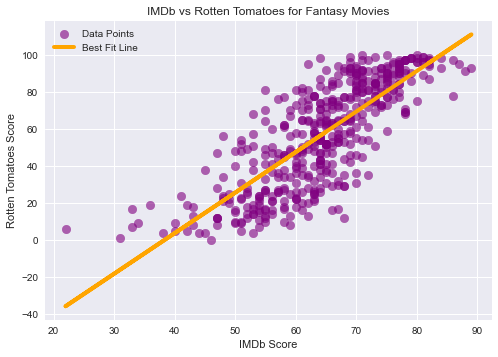

In [101]:
# IMDb vs. Rotten Tomatoes Fantasy
# Create linear regression object
IMDb_Tomatoes_Fantasy = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Fantasy.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Fantasy.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Fantasy Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

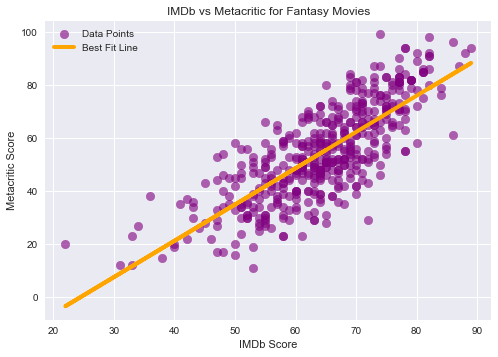

In [102]:
# IMDb vs. Metacritic Fantasy
# Create linear regression object
IMDb_Metacritic_Fantasy = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Fantasy.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Fantasy.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Fantasy Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

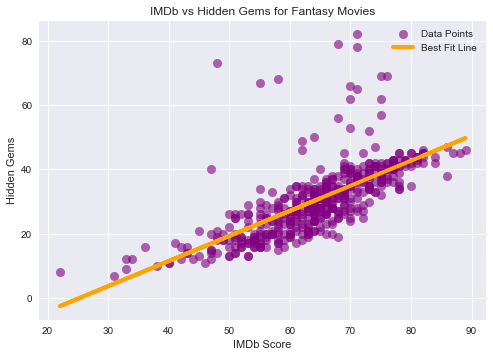

In [103]:
# IMDb vs. Hidden Gems Fantasy
# Create linear regression object
IMDb_Hidden_Gems_Fantasy = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Fantasy.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Fantasy.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Fantasy Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [104]:
# War
Score_Genre_df_War = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'WAR'])
Score_Genre_df_War = Score_Genre_df_War[Score_Genre_df_War['WAR']!= 0]
Score_Genre_df_War

,Hidden_Gem_Score,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,WAR
Key,,,,,
15,42.0,83.0,89.0,78.0,1
53,28.0,66.0,50.0,54.0,1
59,29.0,73.0,51.0,48.0,1
169,34.0,74.0,64.0,63.0,1
255,33.0,68.0,72.0,60.0,1
...,...,...,...,...,...
9175,32.0,66.0,68.0,57.0,1
9263,41.0,74.0,93.0,76.0,1
9269,41.0,74.0,93.0,76.0,1


In [105]:
# Set DataFrame to War columns to lists for best fits
War_IMDb_list = Score_Genre_df_War['IMDb_Score'].tolist()
War_Tomatoes_list = Score_Genre_df_War['Rotten_Tomatoes_Score'].tolist()
War_Metacritic_list = Score_Genre_df_War['Metacritic_Score'].tolist()
War_Hidden_Gem_list = Score_Genre_df_War['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(War_IMDb_list, dtype=np.float64)
T = np.array(War_Tomatoes_list, dtype=np.float64)
M = np.array(War_Metacritic_list, dtype=np.float64)
H = np.array(War_Hidden_Gem_list, dtype=np.float64)

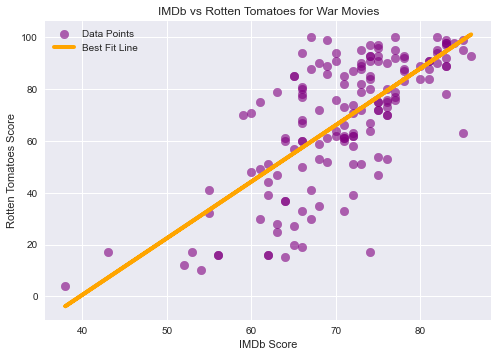

In [106]:
# IMDb vs. Rotten Tomatoes War
# Create linear regression object
IMDb_Tomatoes_War = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_War.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_War.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for War Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

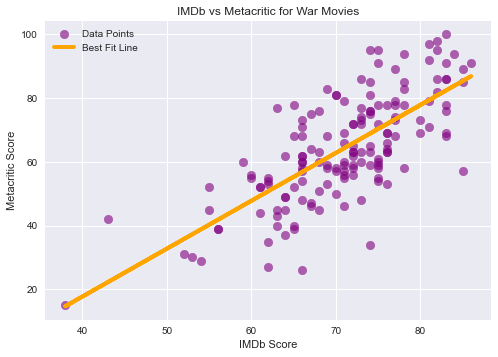

In [107]:
# IMDb vs. Metacritic War
# Create linear regression object
IMDb_Metacritic_War = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_War.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_War.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for War Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

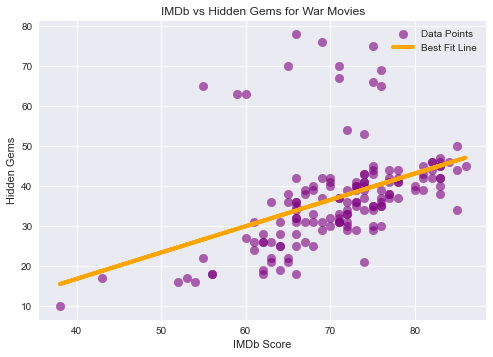

In [108]:
# IMDb vs. Hidden Gems War
# Create linear regression object
IMDb_Hidden_Gems_War = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_War.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_War.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for War Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [109]:
# News
Score_Genre_df_News = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'NEWS'])
Score_Genre_df_News = Score_Genre_df_News[Score_Genre_df_News['NEWS']!= 0]
Score_Genre_df_News

,Hidden_Gem_Score,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,NEWS
Key,,,,,
63,44.0,83.0,97.0,83.0,1
1096,44.0,81.0,98.0,83.0,1
1391,40.0,74.0,90.0,76.0,1
3089,76.0,66.0,50.0,56.0,1
5955,81.0,67.0,86.0,68.0,1
8281,51.0,81.0,100.0,84.0,1


In [110]:
# Set DataFrame to News columns to lists for best fits
News_IMDb_list = Score_Genre_df_News['IMDb_Score'].tolist()
News_Tomatoes_list = Score_Genre_df_News['Rotten_Tomatoes_Score'].tolist()
News_Metacritic_list = Score_Genre_df_News['Metacritic_Score'].tolist()
News_Hidden_Gem_list = Score_Genre_df_News['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(News_IMDb_list, dtype=np.float64)
T = np.array(News_Tomatoes_list, dtype=np.float64)
M = np.array(News_Metacritic_list, dtype=np.float64)
H = np.array(News_Hidden_Gem_list, dtype=np.float64)

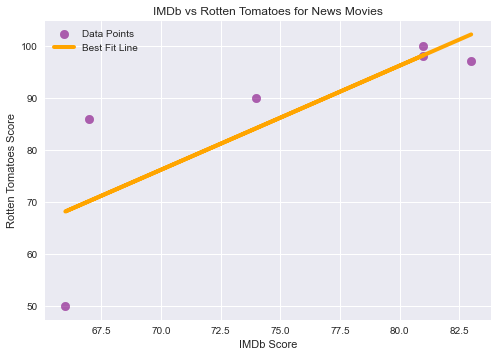

In [111]:
# IMDb vs. Rotten Tomatoes News
# Create linear regression object
IMDb_Tomatoes_News = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_News.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_News.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for News Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

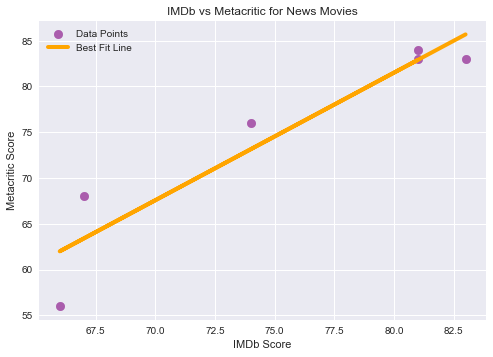

In [112]:
# IMDb vs. Metacritic News
# Create linear regression object
IMDb_Metacritic_News = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_News.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_News.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for News Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

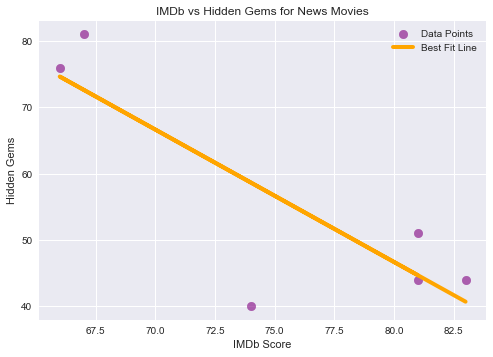

In [113]:
# IMDb vs. Hidden Gems News
# Create linear regression object
IMDb_Hidden_Gems_News = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_News.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_News.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for News Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()